In [49]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from scipy.signal import convolve

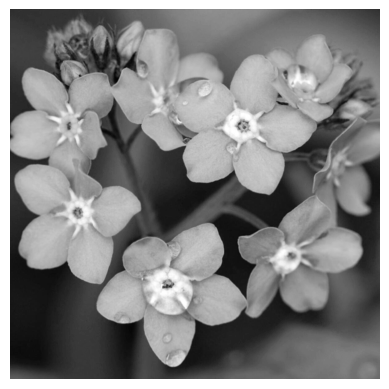

In [50]:
image = Image.open('./images/flower.jpg')
gray_image = image.convert('L')
A = np.array(gray_image)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [51]:
gauss = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])
laplace = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

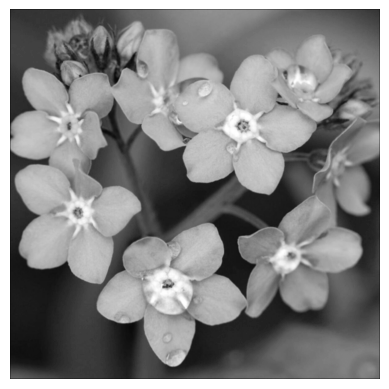

In [52]:
A_gauss = convolve(A, gauss)

plt.imshow(A_gauss, cmap='gray')
plt.axis('off')
plt.show()

In [53]:
A_x = convolve(A_gauss, sobel_x)
A_y = convolve(A_gauss, sobel_y)
A_laplace = convolve(A_gauss, laplace)

In [54]:
A_xy = np.sqrt(A_x**2 + A_y**2)

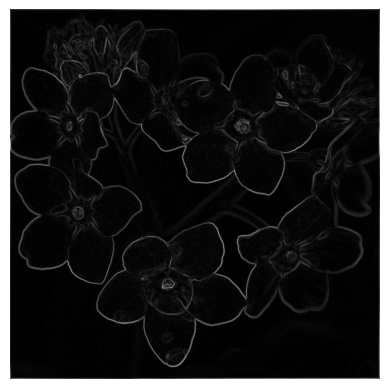

In [55]:
plt.imshow(A_xy, cmap='gray')
plt.axis('off')
plt.show()

In [56]:
A_laplace_x = A_laplace[:, 1:] * A_laplace[:, :-1] <= 0
A_laplace_y = A_laplace[1:, :] * A_laplace[:-1, :] <= 0
A_laplace_xy = A_laplace_x[:-1, :] | A_laplace_y[:, :-1]

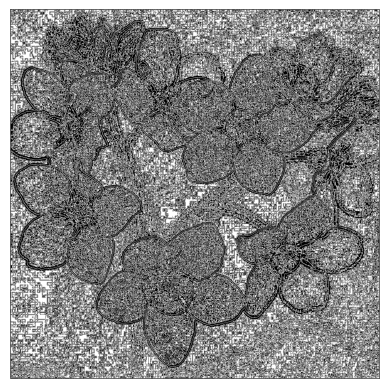

In [57]:
plt.imshow(A_laplace_xy, cmap='gray')
plt.axis('off')
plt.show()

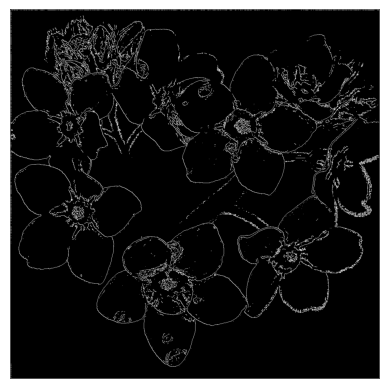

In [58]:
result = (A_xy[:-1, :-1] > 600) & A_laplace_xy

plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()